# Import Libraries and Load Data

In [1]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import random

In [2]:
# preprocessing libraries
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alexc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\alexc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
# Load and preprocess data
df = pd.read_csv("stack-overflow-data.csv")
df = df[pd.notnull(df['tags'])]

In [4]:
# dataframe's shape 
df.shape

(40000, 2)

In [5]:
# preview of data
df.head(5)

,post,tags
0,what is causing this behavior in our c# datet...,c#
1,have dynamic html load as if it was in an ifra...,asp.net
2,how to convert a float value in to min:sec i ...,objective-c
3,.net framework 4 redistributable just wonderi...,.net
4,trying to calculate and print the mean and its...,python


In [6]:
df = df.sample(20000, random_state=1).copy()

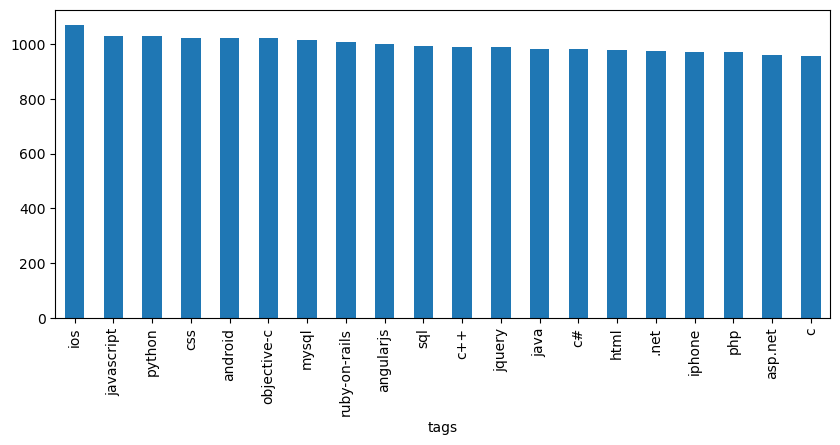

In [7]:
# distribution bar plot
my_tags = ['java','html','asp.net','c#','ruby-on-rails','jquery','mysql','php','ios','javascript','python','c','css','android','iphone','sql','objective-c','c++','angularjs','.net']
plt.figure(figsize=(10,4))
df.tags.value_counts().plot(kind='bar');

In [8]:
# preprocess text
def preprocess_text(text):
    # Lowercasing
    text = text.lower()
    
    # Remove special characters
    text = re.sub(r'\W', ' ', text)
    
    # Tokenization
    words = nltk.word_tokenize(text)
    
    # Remove stop words and lemmatization
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    
    return ' '.join(words)

In [9]:
# Applying preprocessing to your text data
df['post'] = df['post'].apply(preprocess_text)

In [10]:
# Vectorize text data
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df.post).toarray()

In [11]:
# Encode labels
label_enc = LabelEncoder()
labels = label_enc.fit_transform(df.tags)

In [12]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.20, random_state=0)

# Train and Evaluate Multiple Supervised Models

In [13]:
# Define models
models = {
    "LinearSVC": LinearSVC(),
    "MultinomialNB": MultinomialNB(),
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "RandomForestClassifier": RandomForestClassifier()
}

In [14]:
# Evaluate models using 5-fold cross-validation and store results
model_results = {}
for model_name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    mean_cv_score = np.mean(cv_scores)
    model_results[model_name] = mean_cv_score
    print(f"{model_name} - Mean CV Accuracy: {mean_cv_score}")

C:\Users\alexc\anaconda3\envs\caption_contest\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\alexc\anaconda3\envs\caption_contest\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\alexc\anaconda3\envs\caption_contest\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\alexc\anaconda3\envs\caption_contest\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the wa

LinearSVC - Mean CV Accuracy: 0.820625
MultinomialNB - Mean CV Accuracy: 0.7600625000000001
LogisticRegression - Mean CV Accuracy: 0.8151875000000001
RandomForestClassifier - Mean CV Accuracy: 0.7878125


In [15]:
# Convert the dictionary into a list of dictionaries
results_list = [{"Model": model, "Mean CV Accuracy": accuracy} for model, accuracy in model_results.items()]

# Create a DataFrame from the list of dictionaries
results_df = pd.DataFrame(results_list)

# Sort the DataFrame by Mean CV Accuracy in descending order
results_df.sort_values(by="Mean CV Accuracy", ascending=False, inplace=True)

# Display the DataFrame
print(results_df)

                    Model  Mean CV Accuracy
0               LinearSVC          0.820625
2      LogisticRegression          0.815188
3  RandomForestClassifier          0.787813
1           MultinomialNB          0.760063


# Choose the Best Model 

In [16]:
# Select the best model based on mean cross-validation accuracy
best_model_name = max(model_results, key=model_results.get)
best_model = models[best_model_name]

print(f"Best Model: {best_model_name} with Mean CV Accuracy: {model_results[best_model_name]}")

Best Model: LinearSVC with Mean CV Accuracy: 0.820625


# Implement Q-learning with the Best Supervised Model

In [17]:
# Get confidence scores for the training set from the best supervised model
best_model.fit(X_train, y_train)
svc_confidences = best_model.decision_function(X_train)

C:\Users\alexc\anaconda3\envs\caption_contest\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [18]:
# Initialize Q-table
n_states = X_train.shape[0]
n_actions = len(np.unique(labels))
Q_table = np.zeros((n_states, n_actions))

In [29]:
# Hyperparameters for Q-learning
learning_rate = 0.03
discount_factor = 0.75
epsilon = 0.5
n_episodes = 2000

In [30]:
# Function to choose an action based on the state
def choose_action(state, svc_confidence):
    if random.uniform(0, 1) < epsilon:
        # Exploration: Random action
        return random.choice(range(n_actions))
    else:
        # Exploitation: Best action suggested by Q-table and SVC confidence
        combined_action_value = Q_table[state, :] + svc_confidence
        return np.argmax(combined_action_value)

In [31]:
# Q-learning training loop
for episode in range(n_episodes):
    for state in range(n_states):
        svc_confidence = svc_confidences[state]
        action = choose_action(state, svc_confidence)
        predicted_label = action
        actual_label = y_train[state]

        # Reward: +1 for correct, -1 for incorrect
        reward = 1 if predicted_label == actual_label else -1

        # Update Q-table
        Q_table[state, action] = Q_table[state, action] + learning_rate * (reward + discount_factor * np.max(Q_table[state, :]) - Q_table[state, action])

    if episode % 100 == 0:
        print(f"Episode {episode} completed")

Episode 0 completed
Episode 100 completed
Episode 200 completed
Episode 300 completed
Episode 400 completed
Episode 500 completed
Episode 600 completed
Episode 700 completed
Episode 800 completed
Episode 900 completed
Episode 1000 completed
Episode 1100 completed
Episode 1200 completed
Episode 1300 completed
Episode 1400 completed
Episode 1500 completed
Episode 1600 completed
Episode 1700 completed
Episode 1800 completed
Episode 1900 completed


# Evaluate the Combined Model

In [32]:
# Get confidence scores for test set from the best supervised model
svc_test_confidences = best_model.decision_function(X_test)

In [33]:
# Evaluate the combined model
correct_predictions = 0
for state in range(X_test.shape[0]):
    svc_confidence = svc_test_confidences[state]
    combined_action_value = Q_table[state, :] + svc_confidence
    action = np.argmax(combined_action_value)
    if action == y_test[state]:
        correct_predictions += 1

combined_model_accuracy = correct_predictions / X_test.shape[0]
print(f"Combined Model Accuracy: {combined_model_accuracy}")

Combined Model Accuracy: 0.36
